In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Data Ingestion

In [2]:
df= pd.read_csv(r"C:\Users\rachi nikose\Downloads\Admission_Predict.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
#checking top 5 rows and columns
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# getting information about columns
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
#rename the columns
df.rename(columns={"GRE Score":"GRE_Score ","TOEFL Score":"TOEFL_Score","University Rating" : "University_Rating" ,'Chance of Admit ':'Chance of Admit'},inplace=True)

In [8]:
df.columns

Index(['Serial No.', 'GRE_Score ', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
df.dtypes

Serial No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [11]:
df.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
df.tail()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [13]:
df.shape

(400, 9)

# Check duplicate values

In [14]:
df[df.duplicated()]

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit


there is no duplicate values

# Checking null values

In [15]:
df.isna().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Checking Outlier

<AxesSubplot:ylabel='TOEFL_Score'>

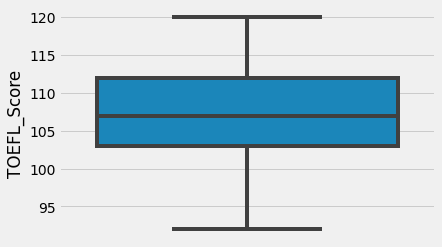

In [16]:
sns.boxplot(y=df['TOEFL_Score'],hue=df['Chance of Admit'],data=df)


<AxesSubplot:ylabel='TOEFL_Score'>

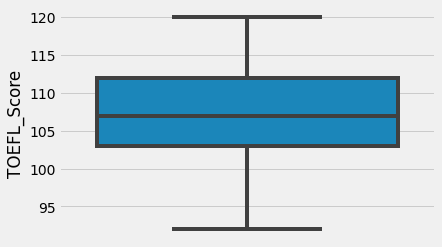

In [17]:
sns.boxplot(y=df['TOEFL_Score'],hue=df['Chance of Admit'],data=df)

<AxesSubplot:ylabel='GRE_Score '>

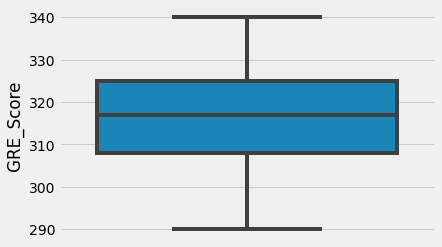

In [18]:
sns.boxplot(y=df['GRE_Score '],hue=df['Chance of Admit'],data=df)


<AxesSubplot:ylabel='SOP'>

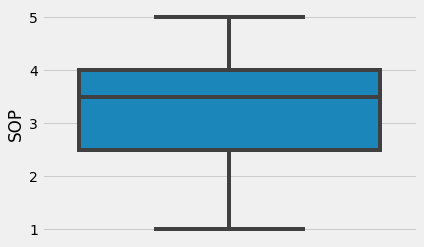

In [19]:
sns.boxplot(y=df['SOP'],hue=df['Chance of Admit'],data=df)


<AxesSubplot:ylabel='LOR '>

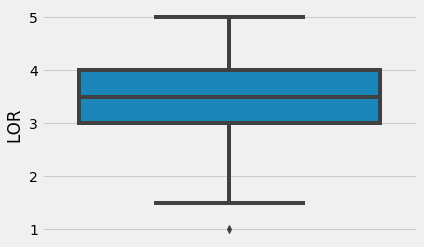

In [20]:
sns.boxplot(y=df['LOR '],hue=df['Chance of Admit'],data=df)


<AxesSubplot:ylabel='CGPA'>

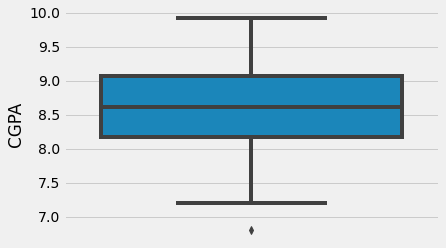

In [21]:
sns.boxplot(y=df['CGPA'],hue=df['Chance of Admit'],data=df)


<AxesSubplot:ylabel='Research'>

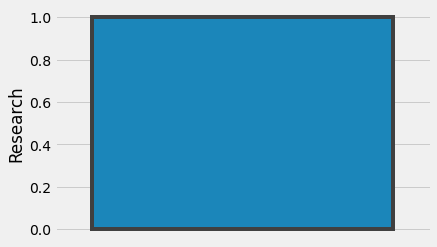

In [22]:
sns.boxplot(y=df['Research'],hue=df['Chance of Admit'],data=df)


very few outliers are present in dataset, this will not affect our model so we do not handle it

In [23]:
df.columns

Index(['Serial No.', 'GRE_Score ', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

# Data Visualization

<AxesSubplot:title={'center':'GRE_Score '}, xlabel='GRE_Score ', ylabel='Density'>

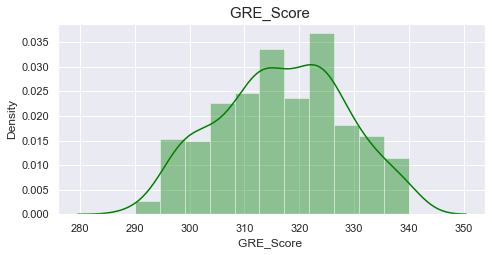

In [46]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.title('GRE_Score ', fontsize=15)
sns.distplot(df['GRE_Score '], color='green')


<AxesSubplot:title={'center':'TOEFL_Score'}, xlabel='TOEFL_Score', ylabel='Density'>

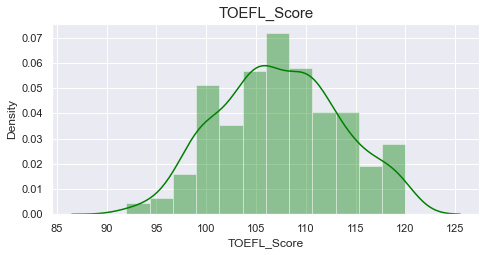

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,2)
plt.title('TOEFL_Score', fontsize=15)
sns.distplot(df['TOEFL_Score'], color='green')


Text(0, 0.5, 'Count of students')

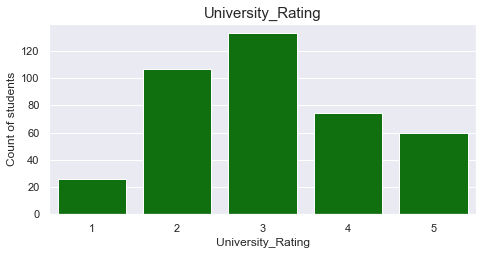

In [41]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.title('University_Rating', fontsize=15)
sns.countplot(x=df['University_Rating'], color='green')
plt.ylabel('Count of students')


<AxesSubplot:title={'center':'CGPA'}, xlabel='CGPA', ylabel='Density'>

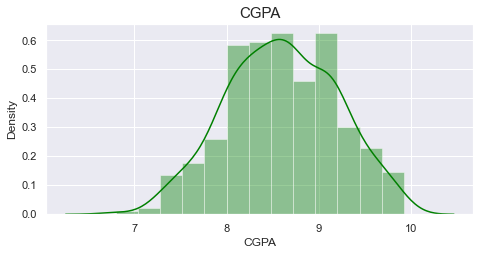

In [44]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,4)
plt.title('CGPA', fontsize=15)
sns.distplot(df['CGPA'], color='green')


<AxesSubplot:title={'center':'LOR '}, xlabel='LOR ', ylabel='count'>

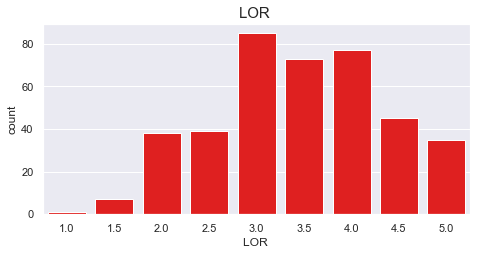

In [55]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.title('LOR ', fontsize=15)
sns.countplot(df['LOR '], color='red')

<AxesSubplot:title={'center':'SOP'}, xlabel='SOP', ylabel='count'>

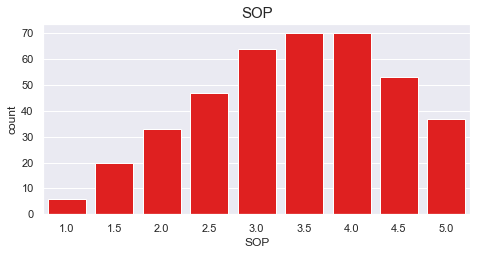

In [59]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,6)
plt.title('SOP', fontsize=15)
sns.countplot(df['SOP'], color='red')


<AxesSubplot:title={'center':'Research'}, xlabel='Research', ylabel='count'>

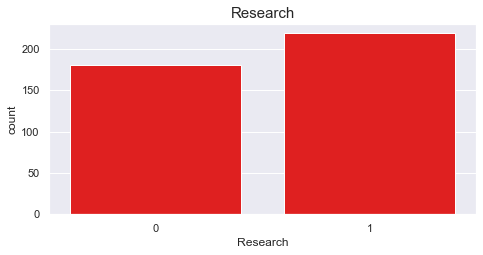

In [61]:
plt.figure(figsize=(15,15))
plt.subplot(4,2,7)
plt.title('Research', fontsize=15)
sns.countplot(df['Research'], color='red')


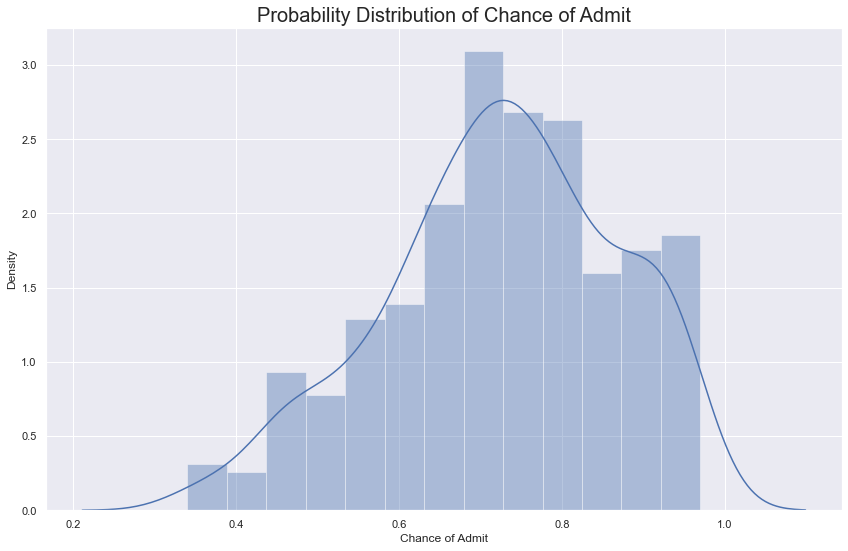

In [31]:
df['Chance of Admit']
sns.distplot(df['Chance of Admit']).set_title('Probability Distribution of Chance of Admit', size='20')
plt.show()


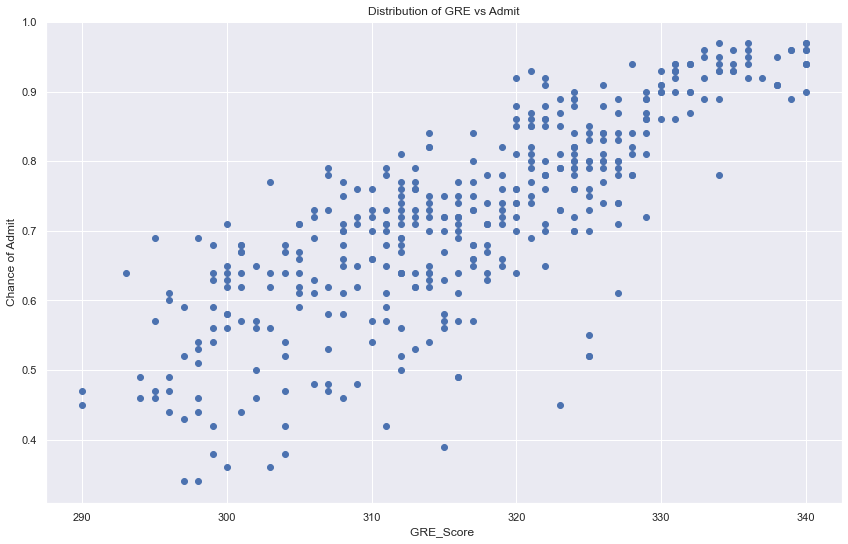

In [85]:
plt.scatter(df['GRE_Score '], df['Chance of Admit'])
plt.xlabel('GRE_Score ')
plt.ylabel('Chance of Admit')
plt.title('Distribution of GRE vs Admit')
plt.show()


In [86]:
#higher the GRE score, Higher the chance of admit.

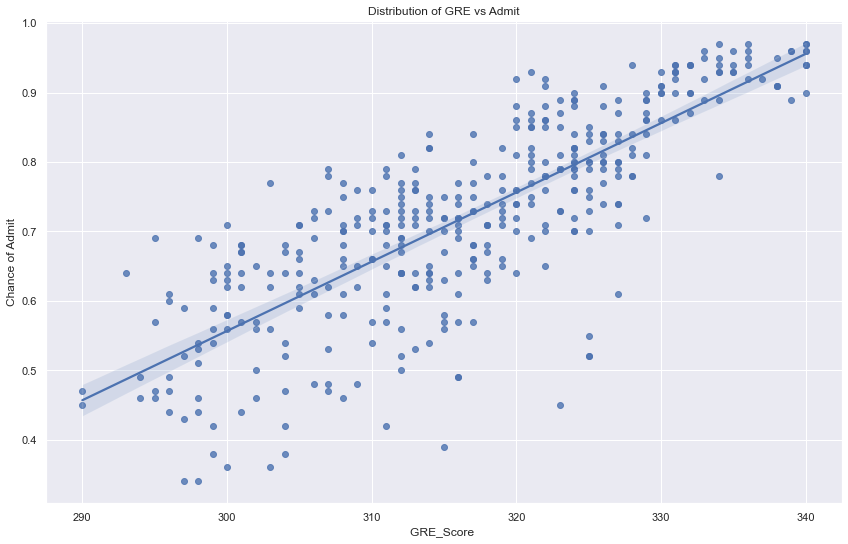

In [87]:
sns.regplot(df['GRE_Score '], df['Chance of Admit'])
plt.xlabel('GRE_Score ')
plt.ylabel('Chance of Admit')
plt.title('Distribution of GRE vs Admit')
plt.show()

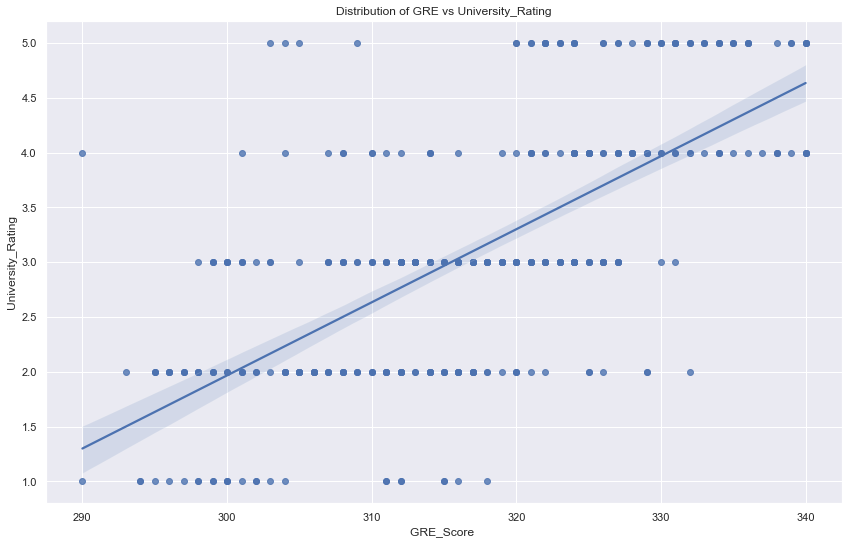

In [88]:
sns.regplot(df['GRE_Score '], df['University_Rating'])
plt.xlabel('GRE_Score ')
plt.ylabel('University_Rating')
plt.title('Distribution of GRE vs University_Rating')
plt.show()

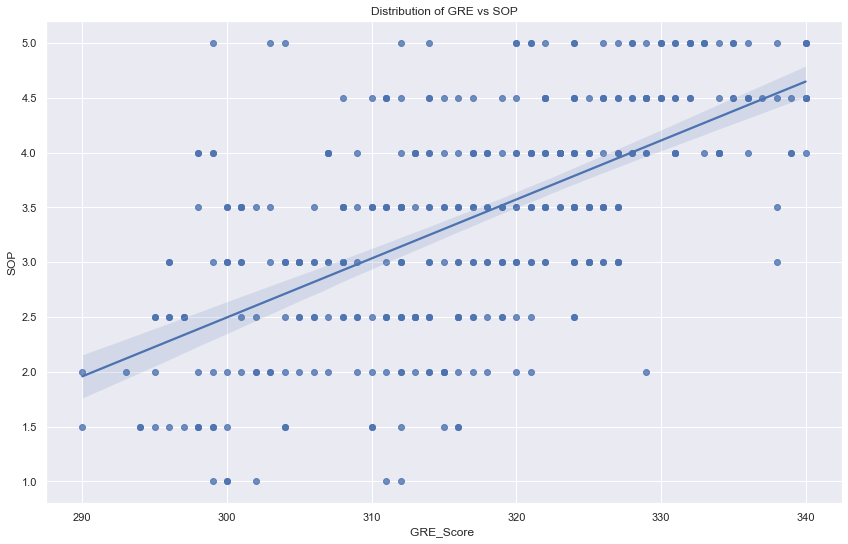

In [89]:
sns.regplot(df['GRE_Score '], df['SOP'])
plt.xlabel('GRE_Score ')
plt.ylabel('SOP')
plt.title('Distribution of GRE vs SOP')
plt.show()

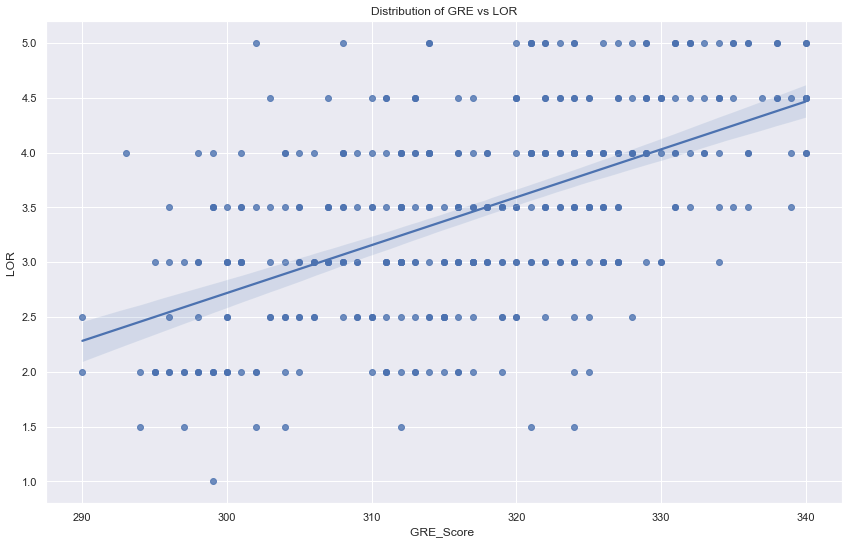

In [90]:
sns.regplot(df['GRE_Score '], df['LOR '])
plt.xlabel('GRE_Score ')
plt.ylabel('LOR ')
plt.title('Distribution of GRE vs LOR')
plt.show()

# Checking the relation between every independet feature and dependent feature

In [62]:
df.corr()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

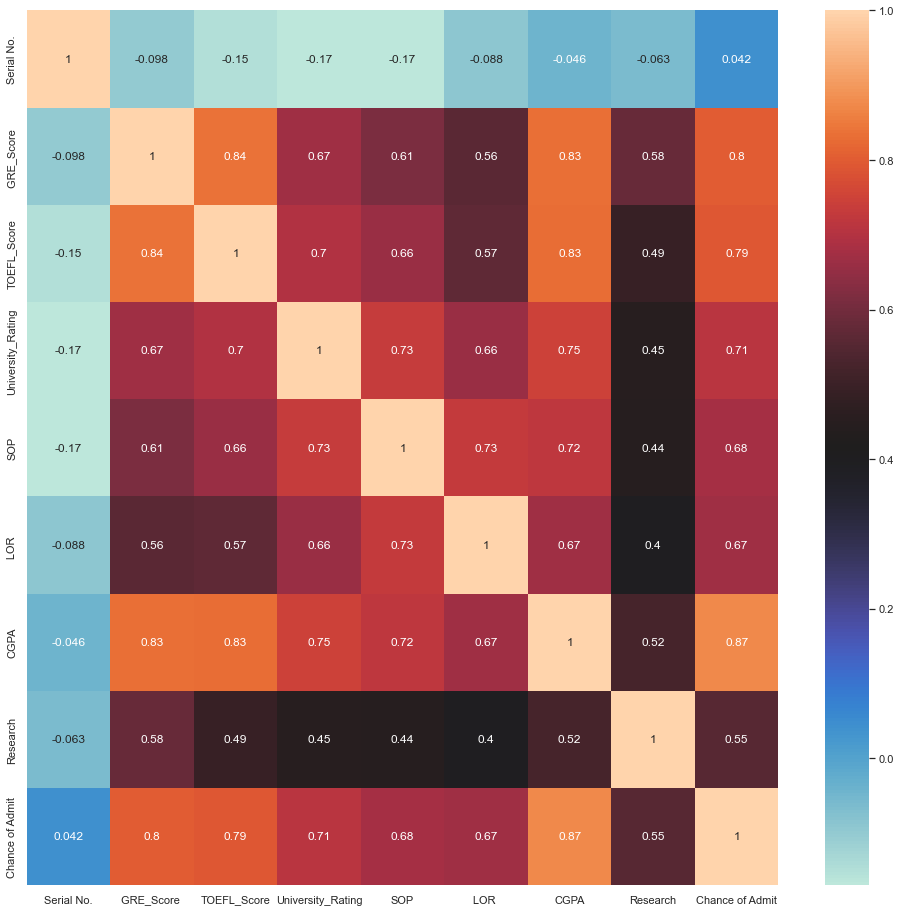

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='icefire')

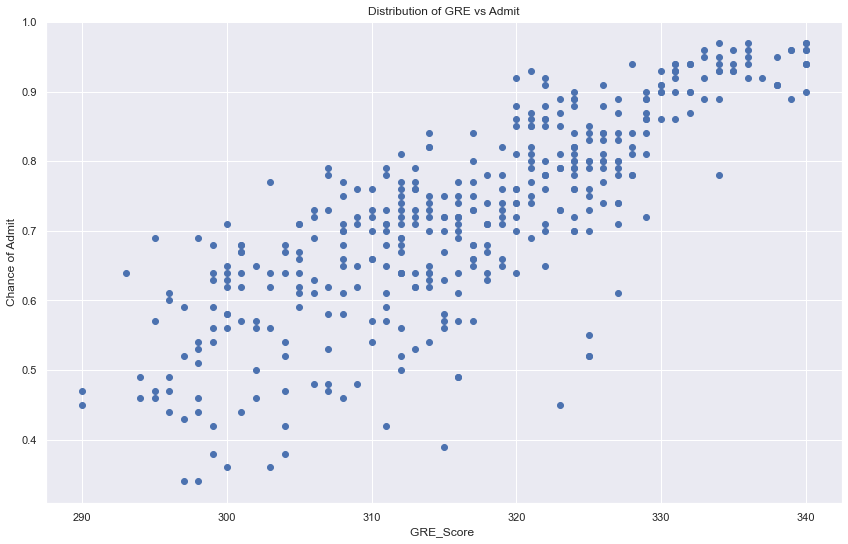

In [67]:
plt.scatter(df['GRE_Score '], df['Chance of Admit'])
plt.xlabel('GRE_Score ')
plt.ylabel('Chance of Admit')
plt.title('Distribution of GRE vs Admit')
plt.show()


higher the GRE score, Higher the chance of admit.

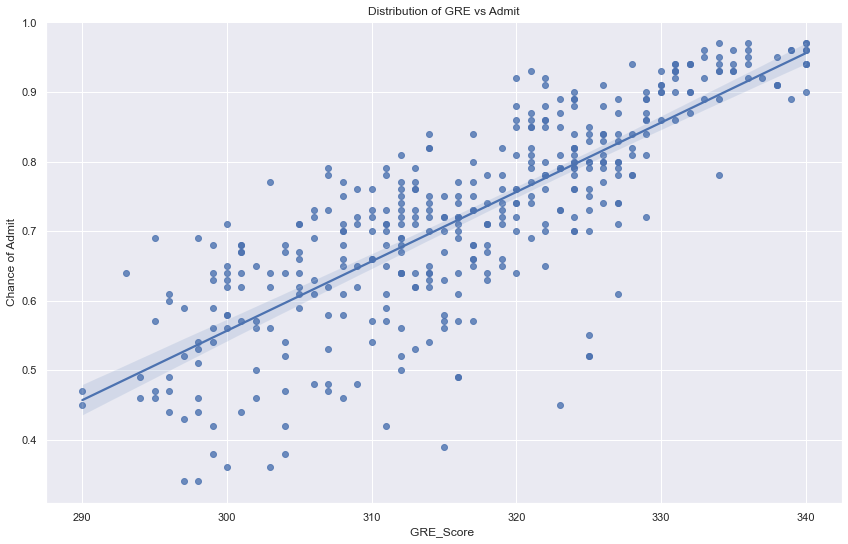

In [72]:
sns.regplot(df['GRE_Score '], df['Chance of Admit'])
plt.xlabel('GRE_Score ')
plt.ylabel('Chance of Admit')
plt.title('Distribution of GRE vs Admit')
plt.show()

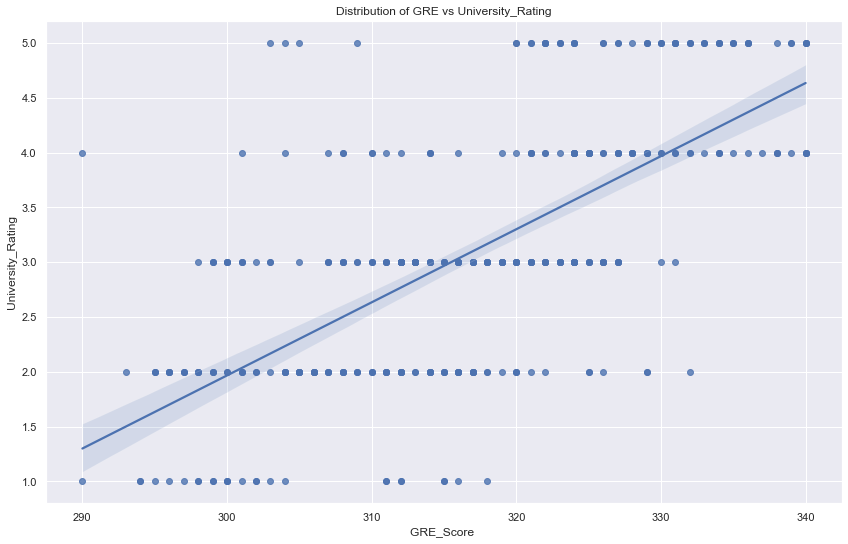

In [75]:
sns.regplot(df['GRE_Score '], df['University_Rating'])
plt.xlabel('GRE_Score ')
plt.ylabel('University_Rating')
plt.title('Distribution of GRE vs University_Rating')
plt.show()


In [79]:
#if the university rating is high, it will be obvious that it will accept higher GRE score
df.columns

Index(['Serial No.', 'GRE_Score ', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [82]:
df.columns

Index(['Serial No.', 'GRE_Score ', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [93]:
#splitting data into independent and dependent features
#dependent features
X=df.iloc[:,:-1]

#independent features
y=df.iloc[:,-1]

In [94]:
X

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [95]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

# Train Test Split

In [97]:
#random statr train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [98]:
X_train.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
258,259,326,102,4,5.0,5.0,8.76,1
177,178,319,110,3,3.5,3.5,9.04,0
119,120,327,104,5,3.0,3.5,8.84,1
194,195,316,109,3,3.5,3.0,8.76,0
229,230,324,111,4,3.0,3.0,9.01,1


In [99]:
X_train.shape,y_train.shape

((268, 8), (268,))

In [100]:
X_test.shape,y_test.shape

((132, 8), (132,))

# Standard Scaler

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [106]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 0.49122561,  0.77697564, -0.94012897, ...,  1.6711815 ,
         0.26249893,  0.89367652],
       [-0.23398695,  0.16169227,  0.39120294, ...,  0.03060772,
         0.73475785, -1.11897312],
       [-0.75327496,  0.86487326, -0.607296  , ...,  0.03060772,
         0.39743005,  0.89367652],
       ...,
       [ 0.5986645 , -0.98097684, -0.44087951, ..., -0.51625021,
        -0.64828613,  0.89367652],
       [ 1.29701734, -1.33256734, -1.43937844, ..., -1.60996606,
        -2.28432597, -1.11897312],
       [-0.90548006, -0.27779585, -0.27446302, ...,  0.03060772,
        -0.59768696, -1.11897312]])

In [107]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.05251677, -1.42046496, -0.607296  , ...,  0.57746565,
        -0.81695004,  0.89367652],
       [ 0.68819692, -0.54148872, -0.94012897, ...,  0.57746565,
         0.06010225,  0.89367652],
       [-1.52325372,  2.00754238,  1.0568689 , ...,  0.57746565,
         1.6792757 ,  0.89367652],
       ...,
       [ 0.37483347,  0.95277089,  0.39120294, ..., -1.06310813,
         0.70102507,  0.89367652],
       [ 0.9657474 ,  0.95277089,  0.05836996, ...,  0.57746565,
         0.97088731,  0.89367652],
       [-0.52049068,  0.2495899 ,  0.89045241, ..., -1.06310813,
         0.06010225,  0.89367652]])

# SVR Model

In [108]:
from sklearn.svm import SVR
regression=SVR(kernel='rbf')
regression.fit(X_train,y_train)

SVR()

In [109]:
y_pred=regression.predict(X_test)
y_pred

array([0.69955595, 0.75522774, 0.82493206, 0.80643254, 0.55586371,
       0.87086044, 0.58297991, 0.47450602, 0.67471123, 0.75755561,
       0.56407271, 0.83776726, 0.56014182, 0.8189361 , 0.65905019,
       0.58577871, 0.71162083, 0.51194369, 0.74015865, 0.84477703,
       0.45500003, 0.51448659, 0.68788735, 0.50756731, 0.85266242,
       0.7643443 , 0.65729507, 0.5593226 , 0.72229477, 0.71979631,
       0.79226911, 0.8935843 , 0.71099845, 0.39162608, 0.69895422,
       0.58891181, 0.65822436, 0.69464061, 0.5863357 , 0.77887546,
       0.74176187, 0.57969903, 0.67738663, 0.86022181, 0.79087449,
       0.82438738, 0.84302588, 0.64754225, 0.85257983, 0.84083476,
       0.84072643, 0.75813422, 0.76914988, 0.87710366, 0.54697121,
       0.5335479 , 0.7273087 , 0.81416926, 0.54424962, 0.81951914,
       0.61231547, 0.6800373 , 0.72322067, 0.4746613 , 0.58986508,
       0.6053192 , 0.6633708 , 0.80774995, 0.8355368 , 0.70962731,
       0.77964299, 0.7311294 , 0.7551204 , 0.756885  , 0.50016

# Performance Matrics

In [110]:
#performance matrics 
from sklearn.metrics import mean_squared_error

In [111]:
from sklearn.metrics import mean_absolute_error

In [112]:
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.00576009602555127
0.06178328221496392


# R Square and Adjusted R-Square

In [113]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print('R-square:',score)

R-square: 0.7426112269313014


In [115]:
#Adjusted r2
adjusted_r_2=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('adjusted_r_2:',adjusted_r_2)

adjusted_r_2: 0.7258704937235811


In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Hyper-parameter Tuning

In [118]:
#hyperparameter tuningh the svm model
param_grid={'kernel':['rbf','linear','poly']}
grid=GridSearchCV(estimator=SVR(),
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [120]:
#predicying data
svr_pred=grid.predict(X_test)

##r2 score
svr_r2Score=metrics.r2_score(y_test,svr_pred)
print('SVR R2 score:',svr_r2Score)

SVR R2 score: 0.7493878304087147


In [123]:
#Adjusted r2 score
Adjusted_r2=1-(1-svr_r2Score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2:',Adjusted_r2)

Adjusted_r2: 0.7330878518987124


In [125]:
print('After Hyper-parameter Tuning')
print(mean_squared_error(y_test,svr_pred))
print(mean_absolute_error(y_test,svr_pred))

After Hyper-parameter Tuning
0.005608442609236304
0.05971258807187055


# Before and After Hyperparameter

In [128]:
print(f"Before Hyper-parameter Tuning\n R-Square:{score}\n Adjusted R_2:{adjusted_r_2}\n")
print(f"After Hyper_parameter Tuning\n R-Square:{svr_r2Score} \n Adjusted R_2:{Adjusted_r2}\n")

Before Hyper-parameter Tuning
 R-Square:0.7426112269313014
 Adjusted R_2:0.7258704937235811

After Hyper_parameter Tuning
 R-Square:0.7493878304087147 
 Adjusted R_2:0.7330878518987124

